In [9]:
import moyra as ma
import moyra.elements as ele
import moyra.forces as ef
import sympy as sym
import sympy.physics.mechanics as me
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
me.mechanics_printing()

In [10]:
DoFs = 2          # total degrees of freedom
p = ma.DynamicModelParameters(DoFs)
vars(p).keys()

dict_keys(['qs', 'q', 'qd', 'qdd', 'x'])

In [58]:
p.m = ma.ModelSymbol(value = 1, string = 'm_1') # the mass of mass 1
p.K = ma.ModelSymbol(value = 10, string = 'K') # spring constant
p.d = ma.ModelSymbol(value = 1, string = 'd') # damping coeffiecnt
p.g  = ma.ModelSymbol(value = 9.81, string = 'g') # gravity

In [59]:
m_frame = ma.HomogenousTransform().R_x(p.q[0]).Translate(0,0,-p.q[1])

In [60]:
# Generate Elements
M = ele.RigidElement.point_mass(m_frame,p.m,gravityPotential=True) # mass
K = ele.Spring(p.q[1],p.K) # spring
D = ele.Damper(p.qd[1],p.d) # damper

## Creating the EoMs

All create elements (and external forces) can then be combined and used to create the Equations of motion (using the euler-lagrange method)

In [61]:
# Generate the Equations of Motion
sm = ma.SymbolicModel.FromElementsAndForces(p,[M,K,D])

The resulting EoM are of the form:
$$M(q,\dot{q})\ddot{q} + f(q,\dot{q}) = Q(q,\dot{q}) $$

In [62]:
sm.M

⎡     2    ⎤
⎢m₁⋅q₁   0 ⎥
⎢          ⎥
⎣  0     m₁⎦

In [63]:
sm.f

⎡   g⋅m₁⋅q₁⋅sin(q₀) + 2⋅m₁⋅q₁⋅q₀̇⋅q₁̇    ⎤
⎢                                      ⎥
⎢                                     2⎥
⎣K⋅q₁ + d⋅q₁̇ - g⋅m₁⋅cos(q₀) - m₁⋅q₁⋅q₀̇ ⎦

if we release from the \[0,0\] position is should fall and oscillate to an equilibrium position

In [64]:
import numpy as np
from scipy.integrate import solve_ivp
## conver to numeric model
nm = ma.NumericModel.from_SymbolicModel(p,sm)

x = [0,0,1,0]
end_time = 10
t = np.linspace(0, end_time, (end_time*100)+1)
y_data = solve_ivp(lambda t, y: nm.deriv(y,p.GetNumericTuple(y, t),t), (0, end_time), x,t_eval = t)

[Text(0.5, 0, 'time [s]'), Text(0, 0.5, 'angle [deg]')]

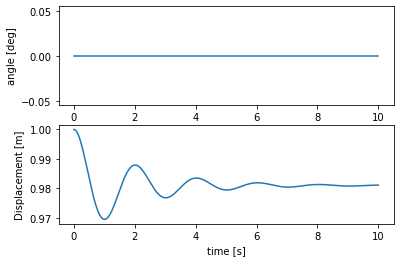

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
ax[0].plot(y_data.t,np.rad2deg(y_data.y[0,:]))
ax[1].plot(y_data.t,y_data.y[2,:])
ax[1].set(xlabel='time [s]',ylabel='Displacement [m]')
ax[0].set(xlabel='time [s]',ylabel='angle [deg]')

what about if we release from an angle?

[Text(0.5, 0, 'time [s]'), Text(0, 0.5, 'angle [deg]')]

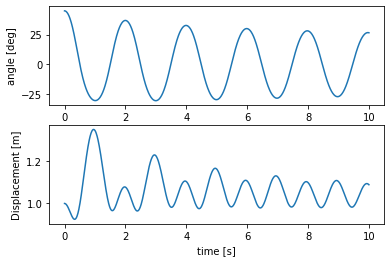

In [67]:
x = [np.deg2rad(45),0,1,0]
y_data = solve_ivp(lambda t, y: nm.deriv(y,p.GetNumericTuple(y, t),t), (0, end_time), x,t_eval = t)

fig, ax = plt.subplots(2)
ax[0].plot(y_data.t,np.rad2deg(y_data.y[0,:]))
ax[1].plot(y_data.t,y_data.y[2,:])
ax[1].set(xlabel='time [s]',ylabel='Displacement [m]')
ax[0].set(xlabel='time [s]',ylabel='angle [deg]')

what about if we increase the damping?

[Text(0.5, 0, 'time [s]'), Text(0, 0.5, 'angle [deg]')]

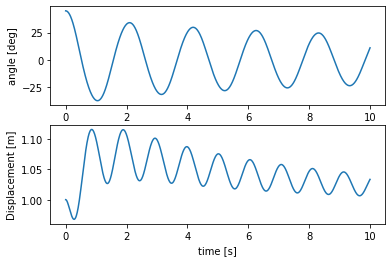

In [69]:
p.d.value = 10
y_data = solve_ivp(lambda t, y: nm.deriv(y,p.GetNumericTuple(y, t),t), (0, end_time), x,t_eval = t)

fig, ax = plt.subplots(2)
ax[0].plot(y_data.t,np.rad2deg(y_data.y[0,:]))
ax[1].plot(y_data.t,y_data.y[2,:])
ax[1].set(xlabel='time [s]',ylabel='Displacement [m]')
ax[0].set(xlabel='time [s]',ylabel='angle [deg]')